### Create a dataset with two Gaussians

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

n_samples = 1000

X1, Y1 = make_classification(n_samples = n_samples, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=1, random_state=0)

X2, Y2 = make_moons(n_samples = n_samples, noise=0.3, random_state=0)



# Decision tree

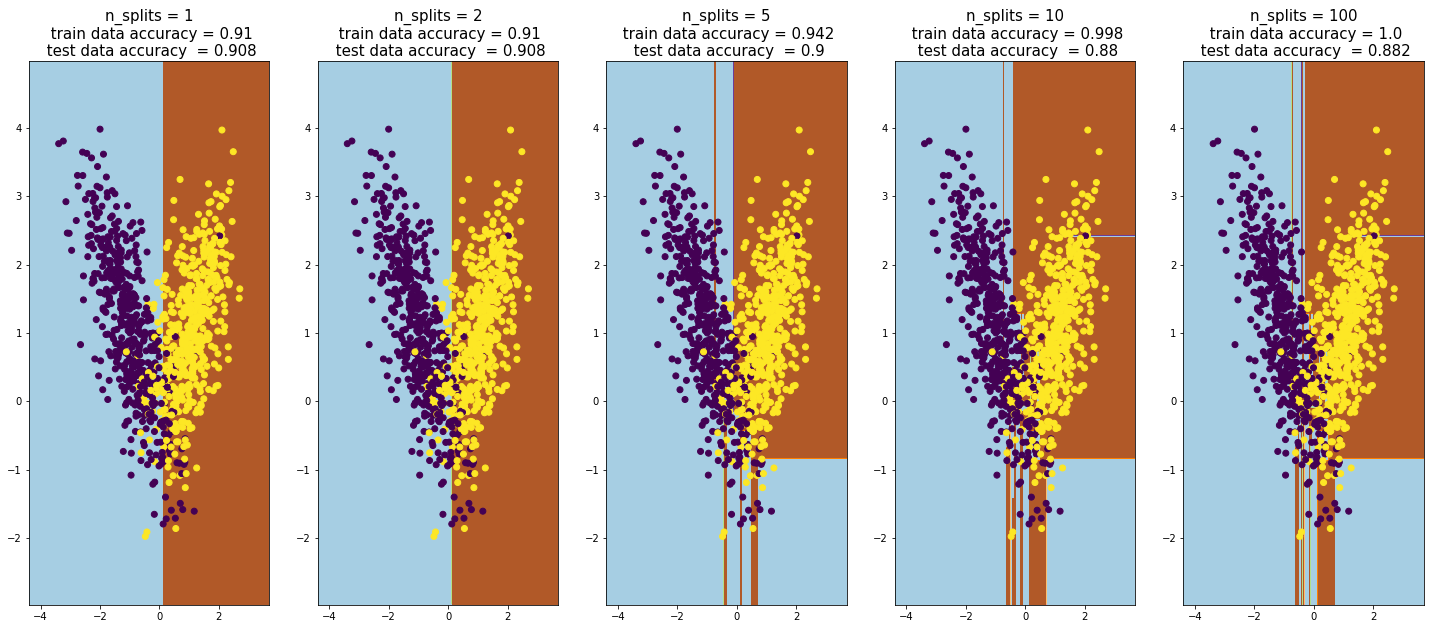

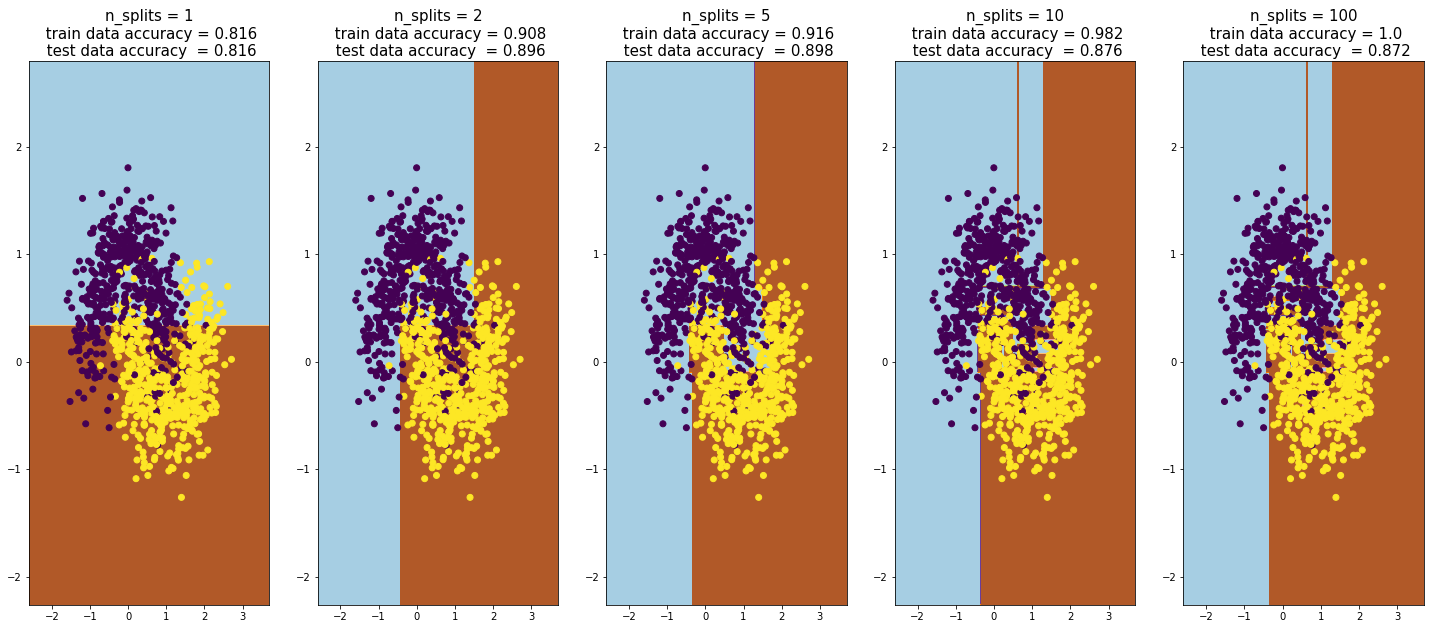

In [6]:
from sklearn.tree import DecisionTreeClassifier

def split(X):
    mid = len(X)//2
    return X[0:mid], X[mid:]

def plot_dt_vs_num_splits(X, Y, plot_step = .01):
   
    #split train and test data
    Xtrain, Xtest = split(X)
    Ytrain, Ytest = split(Y)
    
    #make meshgrid for plotting 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    plt.figure(2,figsize=(25,10))

    splits = [1,2,5,10,100]
    num_splits = len(splits)
    
    for n in range(num_splits):
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=splits[n])
        dt.fit(Xtrain, Ytrain)

        #plot on mesh
        Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.subplot(1, num_splits, n+1)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)    
        plt.title("n_splits = " + str(splits[n]) +
                  "\n train data accuracy = " + str(dt.score(Xtrain,Ytrain)) +
                  "\n test data accuracy  = " + str(dt.score(Xtest,Ytest)), fontsize=15)

    plt.subplots_adjust(hspace=0)
    plt.axis("tight")
    plt.show()
    
plot_dt_vs_num_splits(X1, Y1)
plot_dt_vs_num_splits(X2, Y2)



# Adaboost Ensemble 

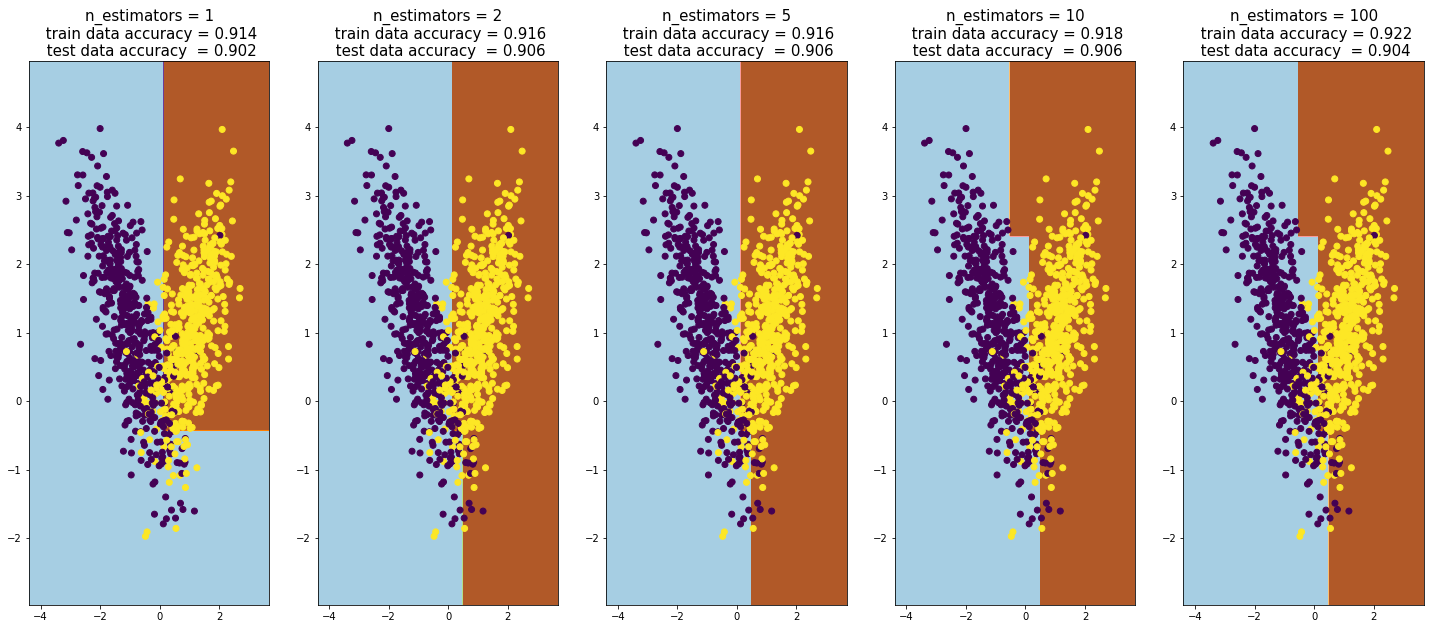

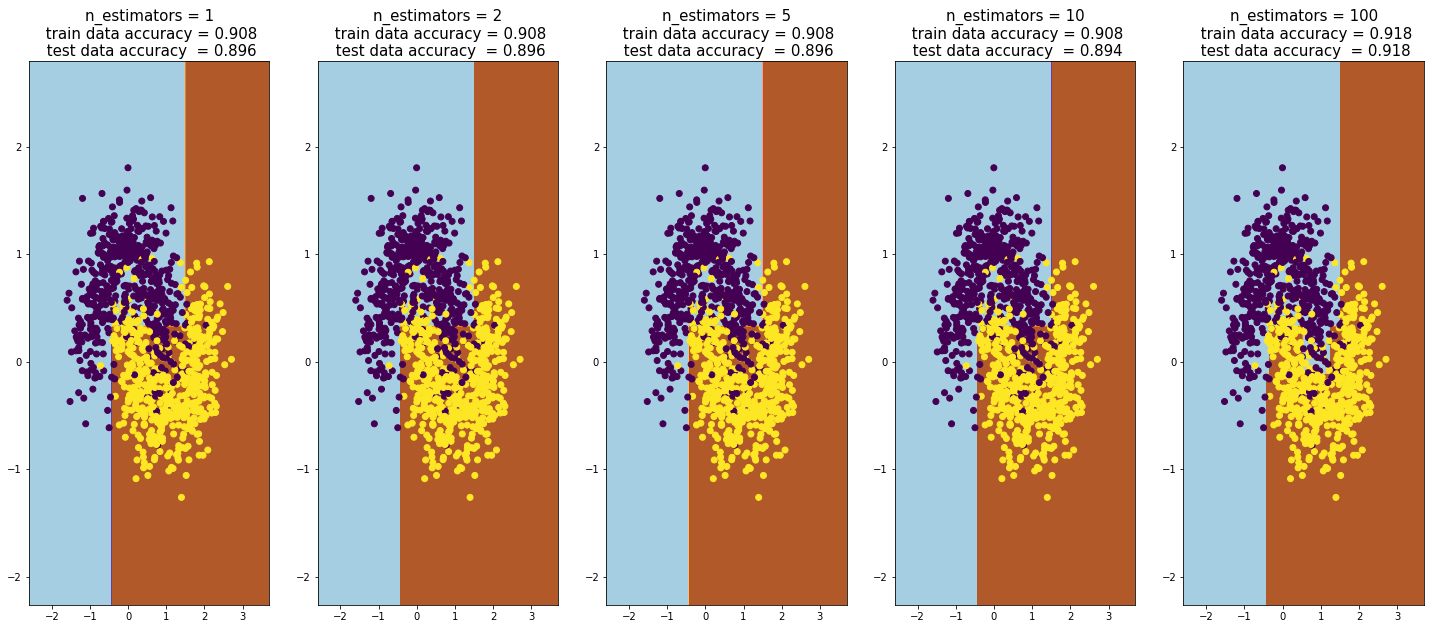

In [7]:
from sklearn.ensemble import AdaBoostClassifier

    
def plot_dt_vs_num_splits(X, Y, max_num_splits = 5, plot_step = .02):
   
    #split train and test data
    Xtrain, Xtest = split(X)
    Ytrain, Ytest = split(Y)
    
    #make meshgrid for plotting 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    plt.figure(2,figsize=(25,10))

    splits = [1,2,5,10,100]
    num_splits = len(splits)
    
    for n in range(num_splits):
        dt_stub = DecisionTreeClassifier(max_depth=2)
        dt = AdaBoostClassifier(base_estimator=dt_stub,n_estimators=n+1)
        dt.fit(Xtrain, Ytrain)

        #plot on mesh
        Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.subplot(1, num_splits, n+1)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)    
        plt.title("n_estimators = " + str(splits[n]) +
                  "\n train data accuracy = " + str(dt.score(Xtrain,Ytrain)) +
                  "\n test data accuracy  = " + str(dt.score(Xtest,Ytest)), fontsize=15)

    plt.subplots_adjust(hspace=0)
    plt.axis("tight")
    plt.show()
    
plot_dt_vs_num_splits(X1, Y1)
plot_dt_vs_num_splits(X2, Y2)
    

# Random forest 

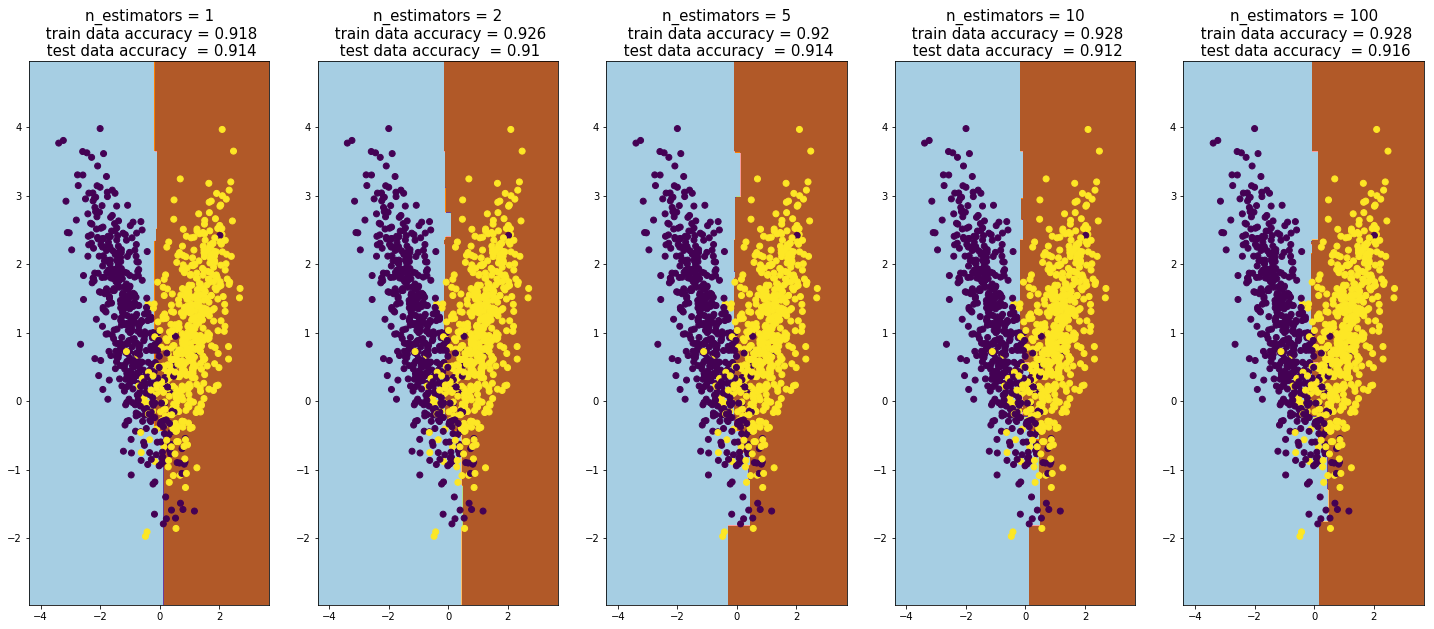

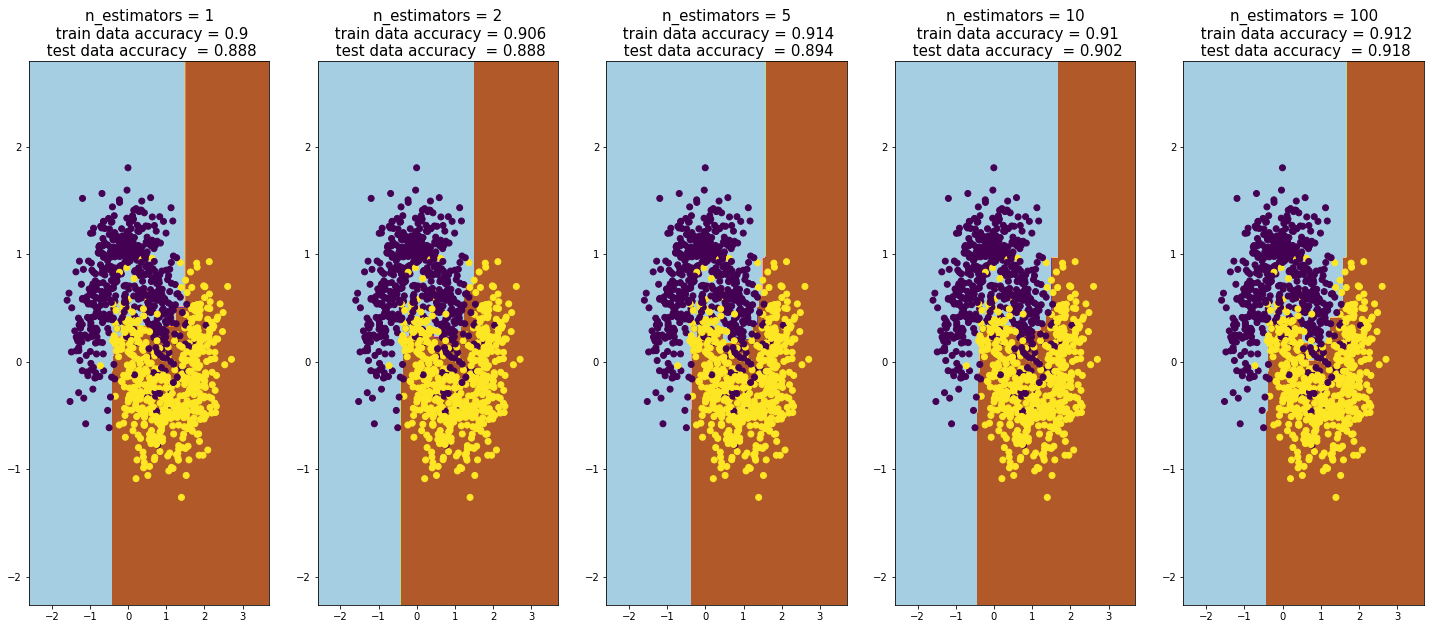

In [4]:
from sklearn.ensemble import RandomForestClassifier

    
def plot_dt_vs_num_splits(X, Y, max_num_splits = 5, plot_step = .02):
   
    #split train and test data
    Xtrain, Xtest = split(X)
    Ytrain, Ytest = split(Y)
    
    #make meshgrid for plotting 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    plt.figure(2,figsize=(25,10))

    splits = [1,2,5,10,100]
    num_splits = len(splits)
    
    for n in range(num_splits):
        dt_stub = RandomForestClassifier(max_depth=2)
        dt = AdaBoostClassifier(base_estimator=dt_stub,n_estimators=n+1)
        dt.fit(Xtrain, Ytrain)

        #plot on mesh
        Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.subplot(1, num_splits, n+1)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)    
        plt.title("n_estimators = " + str(splits[n]) +
                  "\n train data accuracy = " + str(dt.score(Xtrain,Ytrain)) +
                  "\n test data accuracy  = " + str(dt.score(Xtest,Ytest)), fontsize=15)

    plt.subplots_adjust(hspace=0)
    plt.axis("tight")
    plt.show()
    
plot_dt_vs_num_splits(X1, Y1)
plot_dt_vs_num_splits(X2, Y2)
    